# Question 1 SVM and Preprocessing


In [448]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from collections import Counter
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay

print('import moduls was successfully')

import moduls was successfully


## create a data frame with diabetes dataset

In [449]:
diabetes_df = pd.read_csv("diabetes.csv")
display(diabetes_df.head())
display(diabetes_df.info())
display(diabetes_df.describe())

print('➖➖➖➖➖➖➖\nsum of 0 in Pregnancies =',np.sum(diabetes_df['Pregnancies'] == 0) )
print('➖➖➖➖➖➖➖\nsum of 0 in Glucose =',np.sum(diabetes_df['Glucose'] == 0) )
print('➖➖➖➖➖➖➖\nsum of 0 in  BloodPressure=',np.sum(diabetes_df['BloodPressure'] == 0) )
print('➖➖➖➖➖➖➖\nsum of 0 in SkinThickness =',np.sum(diabetes_df['SkinThickness'] == 0) )
print('➖➖➖➖➖➖➖\nsum of 0 in Insulin =',np.sum(diabetes_df['Insulin'] == 0) )
print('➖➖➖➖➖➖➖\nsum of 0 in BMI =',np.sum(diabetes_df['BMI'] == 0) )
print('➖➖➖➖➖➖➖\nsum of 0 in DiabetesPedigreeFunction =',np.sum(diabetes_df['DiabetesPedigreeFunction'] == 0) )
print('➖➖➖➖➖➖➖\nsum of 0 in Age =',np.sum(diabetes_df['Age'] == 0) )
print('➖➖➖➖➖➖➖\nclasses  =',Counter(diabetes_df['Outcome']) )



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


➖➖➖➖➖➖➖
sum of 0 in Pregnancies = 111
➖➖➖➖➖➖➖
sum of 0 in Glucose = 5
➖➖➖➖➖➖➖
sum of 0 in  BloodPressure= 35
➖➖➖➖➖➖➖
sum of 0 in SkinThickness = 227
➖➖➖➖➖➖➖
sum of 0 in Insulin = 374
➖➖➖➖➖➖➖
sum of 0 in BMI = 11
➖➖➖➖➖➖➖
sum of 0 in DiabetesPedigreeFunction = 0
➖➖➖➖➖➖➖
sum of 0 in Age = 0
➖➖➖➖➖➖➖
classes  = Counter({0: 500, 1: 268})


برخی موارد صفر هستن ، اما همه صفر ها به معنی ناقص نیستن 

مثلا در فیچر تعداد زایمان ها صفر منطقی یعنی زایمان نداشته ،ولی در فیچر بی ام آی صفر یعنی نقص یا خطا 

فیچر های صفر شدن در آنها اصلا ممکن نیست موارد زیر هستن 

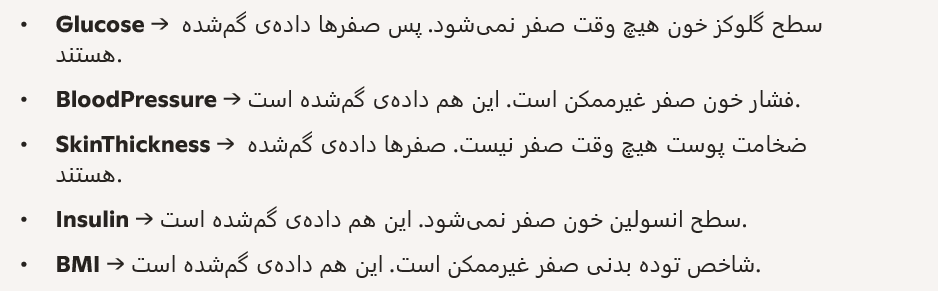

این موارد رو بر اساس میانگین آنها پر میکنیم 

deep copy for A,B,C stratejy

In [450]:
diabetes_df_A = diabetes_df.copy(deep=True)
diabetes_df_B = diabetes_df.copy(deep=True)
diabetes_df_C = diabetes_df.copy(deep=True)

diabetes df for A stratejy

In [451]:

diabetes_df_A['Glucose'] = diabetes_df_A['Glucose'].replace(0, np.nan)
diabetes_df_A['BloodPressure'] = diabetes_df_A['BloodPressure'].replace(0,np.nan)
diabetes_df_A['SkinThickness'] = diabetes_df_A['SkinThickness'].replace(0,np.nan)
diabetes_df_A['Insulin'] = diabetes_df_A['Insulin'].replace(0, np.nan)
diabetes_df_A['BMI'] = diabetes_df_A['BMI'].replace(0, np.nan)

diabetes_df_A['Glucose'] = diabetes_df_A['Glucose'].replace(np.nan, diabetes_df_A['Glucose'].mean())
diabetes_df_A['BloodPressure'] = diabetes_df_A['BloodPressure'].replace(np.nan, diabetes_df_A['BloodPressure'].mean())
diabetes_df_A['SkinThickness'] = diabetes_df_A['SkinThickness'].replace(np.nan, diabetes_df_A['SkinThickness'].mean())
diabetes_df_A['Insulin'] = diabetes_df_A['Insulin'].replace(np.nan, diabetes_df_A['Insulin'].mean())
diabetes_df_A['BMI'] = diabetes_df_A['BMI'].replace(np.nan, diabetes_df_A['BMI'].mean())

print('➖➖➖➖➖➖➖\nsum of 0 in Glucose =', np.sum(diabetes_df_A['Glucose'] == 0))
print('➖➖➖➖➖➖➖\nsum of 0 in BloodPressure =', np.sum(diabetes_df_A['BloodPressure'] == 0))
print('➖➖➖➖➖➖➖\nsum of 0 in SkinThickness =', np.sum(diabetes_df_A['SkinThickness'] == 0))
print('➖➖➖➖➖➖➖\nsum of 0 in Insulin =', np.sum(diabetes_df_A['Insulin'] == 0))
print('➖➖➖➖➖➖➖\nsum of 0 in BMI =', np.sum(diabetes_df_A['BMI'] == 0))
print('➖➖➖➖➖➖➖\nsum of 0 in Age =', np.sum(diabetes_df_A['Age'] == 0))
print('➖➖➖➖➖➖➖\nclasses =', Counter(diabetes_df_A['Outcome']))

➖➖➖➖➖➖➖
sum of 0 in Glucose = 0
➖➖➖➖➖➖➖
sum of 0 in BloodPressure = 0
➖➖➖➖➖➖➖
sum of 0 in SkinThickness = 0
➖➖➖➖➖➖➖
sum of 0 in Insulin = 0
➖➖➖➖➖➖➖
sum of 0 in BMI = 0
➖➖➖➖➖➖➖
sum of 0 in Age = 0
➖➖➖➖➖➖➖
classes = Counter({0: 500, 1: 268})


diabetes df  B for B stratejy

In [452]:
means_for_outcome0 = diabetes_df_B[diabetes_df_B['Outcome'] == 0].mean()
means_for_outcome1 = diabetes_df_B[diabetes_df_B['Outcome'] == 1].mean()


diabetes_df_B['Glucose'] = diabetes_df_B['Glucose'].replace(0, np.nan)
diabetes_df_B['BloodPressure'] = diabetes_df_B['BloodPressure'].replace(0, np.nan)
diabetes_df_B['SkinThickness'] = diabetes_df_B['SkinThickness'].replace(0, np.nan)
diabetes_df_B['Insulin'] = diabetes_df_B['Insulin'].replace(0, np.nan)
diabetes_df_B['BMI'] = diabetes_df_B['BMI'].replace(0, np.nan)

mask_0 = diabetes_df_B['Outcome'] == 0
mask_1 = diabetes_df_B['Outcome'] == 1
# Glucose

diabetes_df_B.loc[mask_0, 'Glucose'] = diabetes_df_B.loc[mask_0, 'Glucose'].fillna(means_for_outcome0['Glucose'])
diabetes_df_B.loc[mask_1, 'Glucose'] = diabetes_df_B.loc[mask_1, 'Glucose'].fillna(means_for_outcome1['Glucose'])
# BloodPressure
diabetes_df_B.loc[mask_0, 'BloodPressure'] = diabetes_df_B.loc[mask_0, 'BloodPressure'].fillna(means_for_outcome0['BloodPressure'])
diabetes_df_B.loc[mask_1, 'BloodPressure'] = diabetes_df_B.loc[mask_1, 'BloodPressure'].fillna(means_for_outcome1['BloodPressure'])

# SkinThickness
diabetes_df_B.loc[mask_0, 'SkinThickness'] = diabetes_df_B.loc[mask_0, 'SkinThickness'].fillna(means_for_outcome0['SkinThickness'])
diabetes_df_B.loc[mask_1, 'SkinThickness'] = diabetes_df_B.loc[mask_1, 'SkinThickness'].fillna(means_for_outcome1['SkinThickness'])

# Insulin
diabetes_df_B.loc[mask_0, 'Insulin'] = diabetes_df_B.loc[mask_0, 'Insulin'].fillna(means_for_outcome0['Insulin'])
diabetes_df_B.loc[mask_1, 'Insulin'] = diabetes_df_B.loc[mask_1, 'Insulin'].fillna(means_for_outcome1['Insulin'])

# BMI
diabetes_df_B.loc[mask_0, 'BMI'] = diabetes_df_B.loc[mask_0, 'BMI'].fillna(means_for_outcome0['BMI'])
diabetes_df_B.loc[mask_1, 'BMI'] = diabetes_df_B.loc[mask_1, 'BMI'].fillna(means_for_outcome1['BMI'])

print('➖➖➖➖➖➖➖\nsum of 0 in Glucose =', np.sum(diabetes_df_B['Glucose'] == 0))
print('➖➖➖➖➖➖➖\nsum of 0 in BloodPressure =', np.sum(diabetes_df_B['BloodPressure'] == 0))
print('➖➖➖➖➖➖➖\nsum of 0 in SkinThickness =', np.sum(diabetes_df_B['SkinThickness'] == 0))
print('➖➖➖➖➖➖➖\nsum of 0 in Insulin =', np.sum(diabetes_df_B['Insulin'] == 0))
print('➖➖➖➖➖➖➖\nsum of 0 in BMI =', np.sum(diabetes_df_B['BMI'] == 0))
print('➖➖➖➖➖➖➖\nsum of 0 in Age =', np.sum(diabetes_df_B['Age'] == 0))
print('➖➖➖➖➖➖➖\nclasses =', Counter(diabetes_df_B['Outcome']))

➖➖➖➖➖➖➖
sum of 0 in Glucose = 0
➖➖➖➖➖➖➖
sum of 0 in BloodPressure = 0
➖➖➖➖➖➖➖
sum of 0 in SkinThickness = 0
➖➖➖➖➖➖➖
sum of 0 in Insulin = 0
➖➖➖➖➖➖➖
sum of 0 in BMI = 0
➖➖➖➖➖➖➖
sum of 0 in Age = 0
➖➖➖➖➖➖➖
classes = Counter({0: 500, 1: 268})


diabetes df C for C stratejy

In [453]:
def knn_impute(df):
    from sklearn.impute import KNNImputer

    imputer = KNNImputer(n_neighbors=5)

    df_imputed = imputer.fit_transform(df)

    return df_imputed

In [454]:
diabetes_df_C['Glucose'] = diabetes_df_C['Glucose'].replace(0, np.nan)
diabetes_df_C['BloodPressure'] = diabetes_df_C['BloodPressure'].replace(0, np.nan)
diabetes_df_C['SkinThickness'] = diabetes_df_C['SkinThickness'].replace(0, np.nan)
diabetes_df_C['Insulin'] = diabetes_df_C['Insulin'].replace(0, np.nan)
diabetes_df_C['BMI'] = diabetes_df_C['BMI'].replace(0, np.nan)

diabetes_df_C = pd.DataFrame(knn_impute(diabetes_df_C),columns=diabetes_df_C.columns)
display(diabetes_df_C.head())
print('➖➖➖➖➖➖➖\nsum of 0 in Glucose =', np.sum(diabetes_df_C['Glucose'] == 0))
print('➖➖➖➖➖➖➖\nsum of 0 in BloodPressure =', np.sum(diabetes_df_C['BloodPressure'] == 0))
print('➖➖➖➖➖➖➖\nsum of 0 in SkinThickness =', np.sum(diabetes_df_C['SkinThickness'] == 0))
print('➖➖➖➖➖➖➖\nsum of 0 in Insulin =', np.sum(diabetes_df_C['Insulin'] == 0))
print('➖➖➖➖➖➖➖\nsum of 0 in BMI =', np.sum(diabetes_df_C['BMI'] == 0))
print('➖➖➖➖➖➖➖\nsum of 0 in Age =', np.sum(diabetes_df_C['Age'] == 0))
print('➖➖➖➖➖➖➖\nclasses =', Counter(diabetes_df_C['Outcome']))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,25.8,164.6,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


➖➖➖➖➖➖➖
sum of 0 in Glucose = 0
➖➖➖➖➖➖➖
sum of 0 in BloodPressure = 0
➖➖➖➖➖➖➖
sum of 0 in SkinThickness = 0
➖➖➖➖➖➖➖
sum of 0 in Insulin = 0
➖➖➖➖➖➖➖
sum of 0 in BMI = 0
➖➖➖➖➖➖➖
sum of 0 in Age = 0
➖➖➖➖➖➖➖
classes = Counter({0.0: 500, 1.0: 268})


کی ان ان ، هر مقداری که ناقص یا (نن) باشد را با توجه به میانگین پنج همسایه نزدیک تکمیل میکند ، از این جهت از میانگین ساده بهتر است که مقادیر را بر اساس نمونه های نزدیک به آن مقادیر ناقص را پر میکند ولی از این جهت بد است که ممکن است نمونه های نزدیک یک نمونه از کلاس های دیگری باشند 

مگر اینکه بر اساس لیبل ها مرتب کنیم تا کلاس ها از هم جدا باشن 

در نهایت به نظرم بهترین استراتژی برای دیتافریم بی هست پس برای ادامه این تمرین از این دیتا ست استفاده خواهیم کرد

# Feature Engineering

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,100.335821,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,68.792000,26.6,0.351,31,0
2,8,183.0,64.0,22.164179,100.335821,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_Categorical
0,6,148.0,72.0,35.000000,100.335821,33.6,0.627,50,1,Diabetic
1,1,85.0,66.0,29.000000,68.792000,26.6,0.351,31,0,Normal
2,8,183.0,64.0,22.164179,100.335821,23.3,0.672,32,1,Diabetic
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0,Normal
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1,Diabetic


Counter({'Diabetic': 313, 'Prediabetes': 263, 'Normal': 192})


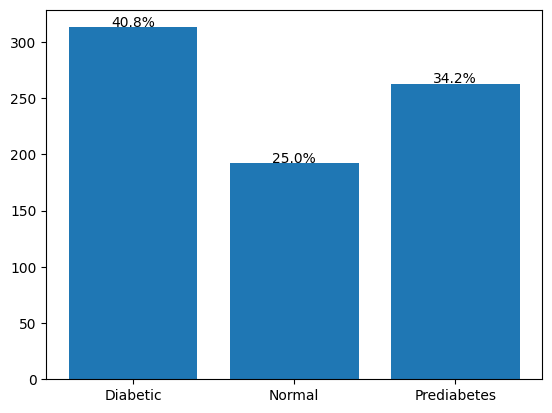

In [455]:
display(diabetes_df_B.head())

Glucose_cat = ['Normal',"Prediabetes","Diabetic"]
new_features = []
for i in range(len(diabetes_df_B)):
    if diabetes_df_B.loc[i,'Glucose'] < 100 :
        new_features.append(Glucose_cat[0])

    elif diabetes_df_B.loc[i,'Glucose'] >= 100 and diabetes_df_B.loc[i,'Glucose'] < 125:
        new_features.append(Glucose_cat[1])

    elif diabetes_df_B.loc[i,'Glucose'] >= 125:
        new_features.append(Glucose_cat[2])

diabetes_df_B['Glucose_Categorical'] = new_features

display(diabetes_df_B.head())

new_features_frq = Counter(new_features)
print(new_features_frq)

plt.bar(x=new_features_frq.keys(),height=new_features_frq.values())
total = sum(new_features_frq.values())
for i, (cat, count) in enumerate(new_features_frq.items()):
    percent = (count / total) * 100
    plt.text(i, count + 0.5, f"{percent:.1f}%", ha='center')

plt.show()

بله اکثر افراد با توجه به چیزی که تو نمودار قابل مشاهده تو دسته دیابتی قرار دارند 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_Categorical
0,6,148.0,72.0,35.000000,100.335821,33.6,0.627,50,1,Diabetic
1,1,85.0,66.0,29.000000,68.792000,26.6,0.351,31,0,Normal
2,8,183.0,64.0,22.164179,100.335821,23.3,0.672,32,1,Diabetic
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0,Normal
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1,Diabetic


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_Categorical,BMI_Categorical
0,6,148.0,72.0,35.000000,100.335821,33.6,0.627,50,1,Diabetic,Obese
1,1,85.0,66.0,29.000000,68.792000,26.6,0.351,31,0,Normal,Overweight
2,8,183.0,64.0,22.164179,100.335821,23.3,0.672,32,1,Diabetic,Normal
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0,Normal,Overweight
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1,Diabetic,Obese


Counter({'Obese': 483, 'Overweight': 179, 'Normal': 102, 'Underweight': 4})


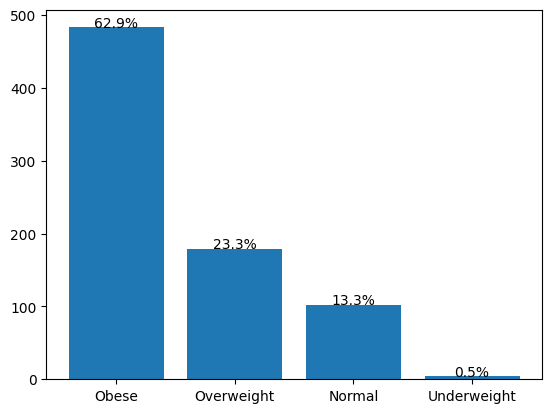

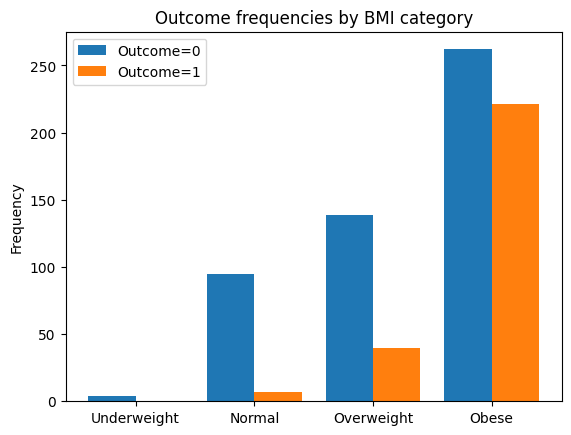

In [456]:
display(diabetes_df_B.head())

BMI_cat = ['Underweight',"Normal","Overweight","Obese"]
new_features = []
for i in range(len(diabetes_df_B)):
    if diabetes_df_B.loc[i,'BMI'] < 18.5 :
        new_features.append(BMI_cat[0])

    elif diabetes_df_B.loc[i,'BMI'] >= 18.5 and diabetes_df_B.loc[i,'BMI'] < 25:
        new_features.append(BMI_cat[1])

    elif diabetes_df_B.loc[i,'BMI'] >= 25 and diabetes_df_B.loc[i,'BMI'] < 30:
        new_features.append(BMI_cat[2])
    elif diabetes_df_B.loc[i,'BMI'] >= 30:
        new_features.append(BMI_cat[3])

diabetes_df_B['BMI_Categorical'] = new_features

display(diabetes_df_B.head())

new_features_frq = Counter(new_features)
print(new_features_frq)

plt.bar(x=new_features_frq.keys(),height=new_features_frq.values())
total = sum(new_features_frq.values())
for i, (cat, count) in enumerate(new_features_frq.items()):
    percent = (count / total) * 100
    plt.text(i, count + 0.5, f"{percent:.1f}%", ha='center')

plt.show()

under_weight = diabetes_df_B[diabetes_df_B['BMI_Categorical']=='Underweight']
under_weight_frq = Counter(under_weight['Outcome'])

normal = diabetes_df_B[diabetes_df_B['BMI_Categorical']=='Normal']
normal_frq = Counter(normal['Outcome'])


over_weight = diabetes_df_B[diabetes_df_B['BMI_Categorical']=='Overweight']
over_weight_frq = Counter(over_weight['Outcome'])

obese = diabetes_df_B[diabetes_df_B['BMI_Categorical']=='Obese']
obese_frq = Counter(obese['Outcome'])


categories = ['Underweight','Normal','Overweight','Obese']
outcome0 = [under_weight_frq.get(0,0), normal_frq.get(0,0), over_weight_frq.get(0,0), obese_frq.get(0,0)]
outcome1 = [under_weight_frq.get(1,0), normal_frq.get(1,0), over_weight_frq.get(1,0), obese_frq.get(1,0)]

x = range(len(categories))
plt.bar([i-0.2 for i in x], outcome0, width=0.4, label='Outcome=0')
plt.bar([i+0.2 for i in x], outcome1, width=0.4, label='Outcome=1')

plt.xticks(x, categories)
plt.ylabel("Frequency")
plt.title("Outcome frequencies by BMI category")
plt.legend()
plt.show()


بیشترین فراوانی برای چاقی شدید بالا تر از بی ام آی 30 بود ، تقریبا نیمی از آنها دیابت داشتند و در کل بیشترین تعداد دیابتی در زنان قبیله برای این دسته بود 
کمترین فراوانی برای گروه کم وزن با 4 نفر زیر بی ام آی 18.5 بود 

در کل این قبیله از این نظر به شدت دچار چاقی است که تا اینجا به نظر میرسد رابطه قابل توجهی با دیابت دارد 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_Categorical,BMI_Categorical
0,6,148.0,72.0,35.000000,100.335821,33.6,0.627,50,1,Diabetic,Obese
1,1,85.0,66.0,29.000000,68.792000,26.6,0.351,31,0,Normal,Overweight
2,8,183.0,64.0,22.164179,100.335821,23.3,0.672,32,1,Diabetic,Normal
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0,Normal,Overweight
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1,Diabetic,Obese


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_Categorical,BMI_Categorical,Age_Categorical
0,6,148.0,72.0,35.000000,100.335821,33.6,0.627,50,1,Diabetic,Obese,Senior
1,1,85.0,66.0,29.000000,68.792000,26.6,0.351,31,0,Normal,Overweight,Middle_Aged
2,8,183.0,64.0,22.164179,100.335821,23.3,0.672,32,1,Diabetic,Normal,Middle_Aged
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0,Normal,Overweight,Young
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1,Diabetic,Obese,Middle_Aged


Counter({'Young': 396, 'Middle_Aged': 254, 'Senior': 86, 'Elderly': 32})


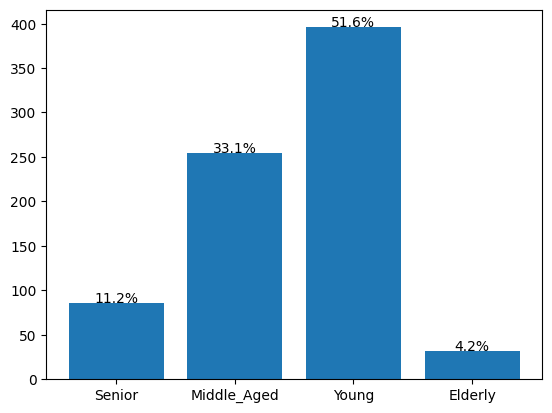

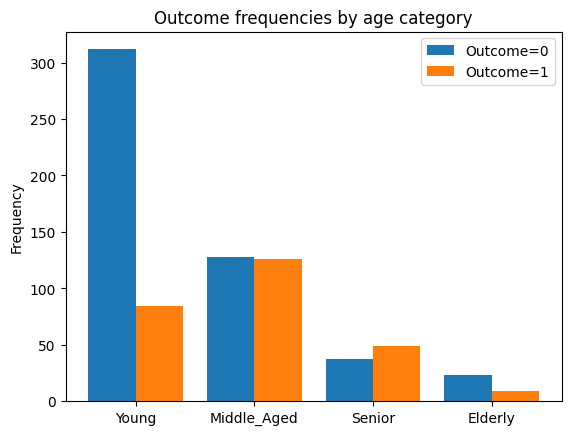

In [457]:
display(diabetes_df_B.head())

Age_cat = ['Young',"Middle_Aged","Senior","Elderly"]
new_features = []
for i in range(len(diabetes_df_B)):
    if diabetes_df_B.loc[i,'Age'] < 30 and  diabetes_df_B.loc[i,'Age'] >= 21:
        new_features.append(Age_cat[0])

    elif diabetes_df_B.loc[i,'Age'] >= 30 and diabetes_df_B.loc[i,'Age'] <= 45:
        new_features.append(Age_cat[1])

    elif diabetes_df_B.loc[i,'Age'] > 45 and diabetes_df_B.loc[i,'Age'] < 60:
        new_features.append(Age_cat[2])
    elif diabetes_df_B.loc[i,'Age'] >= 60:
        new_features.append(Age_cat[3])

diabetes_df_B['Age_Categorical'] = new_features

display(diabetes_df_B.head())

new_features_frq = Counter(new_features)
print(new_features_frq)

plt.bar(x=new_features_frq.keys(),height=new_features_frq.values())
total = sum(new_features_frq.values())
for i, (cat, count) in enumerate(new_features_frq.items()):
    percent = (count / total) * 100
    plt.text(i, count + 0.5, f"{percent:.1f}%", ha='center')

plt.show()

young = diabetes_df_B[diabetes_df_B['Age_Categorical']=='Young']
young_frq = Counter(young['Outcome'])

middle_aged = diabetes_df_B[diabetes_df_B['Age_Categorical']=='Middle_Aged']
middle_aged_frq = Counter(middle_aged['Outcome'])

senior = diabetes_df_B[diabetes_df_B['Age_Categorical']=='Senior']
senior_frq = Counter(senior['Outcome'])

elderly = diabetes_df_B[diabetes_df_B['Age_Categorical']=='Elderly']
elderly_frq = Counter(elderly['Outcome'])


categories = ['Young',"Middle_Aged","Senior","Elderly"]
outcome0 = [young_frq.get(0,0), middle_aged_frq.get(0,0), senior_frq.get(0,0), elderly_frq.get(0,0)]
outcome1 = [young_frq.get(1,0), middle_aged_frq.get(1,0), senior_frq.get(1,0), elderly_frq.get(1,0)]

x = range(len(categories))
plt.bar([i-0.2 for i in x], outcome0, width=0.4, label='Outcome=0')
plt.bar([i+0.2 for i in x], outcome1, width=0.4, label='Outcome=1')

plt.xticks(x, categories)
plt.ylabel("Frequency")
plt.title("Outcome frequencies by age category")
plt.legend()
plt.show()


بیشترین جمعیت قبیله برای زنان جوان  است حدود یک چهارم آنها مبتلا به دیابت هستند 


بیشترین جمعیت دیابتی برای میان سال هاست که 50% آنها دیابتی هستند 

وضعیت در سینیور حتی بدتر است و بیشتر جمعیت آنها دچار دیابت هستند ولی جمعیت کلی آنها کم تر است = کاهش طول عمر در اثر دیابت 

و افراد خیلی پیر که به طرز عجیبی دیابتی کمتری دارند ولی جمعیت آنها هم بسیار کم است یعنی اکثر آنها مرده اند و به این سن نرسیده اند ولی انها یی که زنده مانده اند به علت نداشتن دیابت بیشتر عمر کردند 


In [458]:
diabetes_df_B['Insulin_to_Glucose_Ratio'] = diabetes_df_B['Insulin'] / diabetes_df_B['Glucose']

display(diabetes_df_B)

display(diabetes_df_B.loc[:,['Insulin_to_Glucose_Ratio','Outcome']].corr())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_Categorical,BMI_Categorical,Age_Categorical,Insulin_to_Glucose_Ratio
0,6,148.0,72.0,35.000000,100.335821,33.6,0.627,50,1,Diabetic,Obese,Senior,0.677945
1,1,85.0,66.0,29.000000,68.792000,26.6,0.351,31,0,Normal,Overweight,Middle_Aged,0.809318
2,8,183.0,64.0,22.164179,100.335821,23.3,0.672,32,1,Diabetic,Normal,Middle_Aged,0.548283
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0,Normal,Overweight,Young,1.056180
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1,Diabetic,Obese,Middle_Aged,1.226277
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0,Prediabetes,Obese,Elderly,1.782178
764,2,122.0,70.0,27.000000,68.792000,36.8,0.340,27,0,Prediabetes,Obese,Young,0.563869
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0,Prediabetes,Overweight,Middle_Aged,0.925620
766,1,126.0,60.0,22.164179,100.335821,30.1,0.349,47,1,Diabetic,Obese,Senior,0.796316


,Insulin_to_Glucose_Ratio,Outcome
Insulin_to_Glucose_Ratio,1.000000,0.141063
Outcome,0.141063,1.000000


همبستگی قابل توجهی بین این دو ویژگی وجود ندارد ، البته این لزوما به این معنا نیست که هیچ نوع دیپندنسی بین این دو نباشد 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_Categorical,BMI_Categorical,Age_Categorical,Insulin_to_Glucose_Ratio
0,6,148.0,72.0,35.000000,100.335821,33.6,0.627,50,1,Diabetic,Obese,Senior,0.677945
1,1,85.0,66.0,29.000000,68.792000,26.6,0.351,31,0,Normal,Overweight,Middle_Aged,0.809318
2,8,183.0,64.0,22.164179,100.335821,23.3,0.672,32,1,Diabetic,Normal,Middle_Aged,0.548283
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0,Normal,Overweight,Young,1.056180
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1,Diabetic,Obese,Middle_Aged,1.226277


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_Categorical,BMI_Categorical,Age_Categorical,Insulin_to_Glucose_Ratio,BloodPressure_Categorical
0,6,148.0,72.0,35.000000,100.335821,33.6,0.627,50,1,Diabetic,Obese,Senior,0.677945,Low
1,1,85.0,66.0,29.000000,68.792000,26.6,0.351,31,0,Normal,Overweight,Middle_Aged,0.809318,Low
2,8,183.0,64.0,22.164179,100.335821,23.3,0.672,32,1,Diabetic,Normal,Middle_Aged,0.548283,Low
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0,Normal,Overweight,Young,1.056180,Low
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1,Diabetic,Obese,Middle_Aged,1.226277,Low


Counter({'Low': 563, 'Normal': 167, 'High': 38})


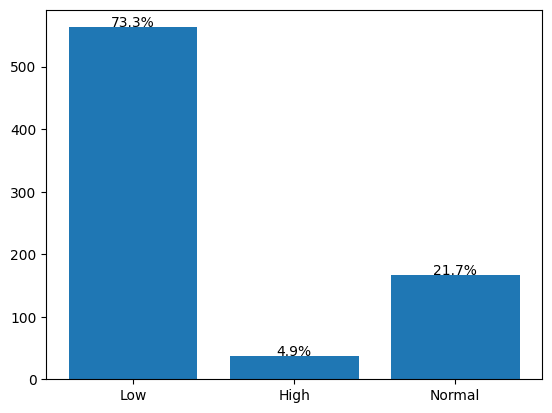

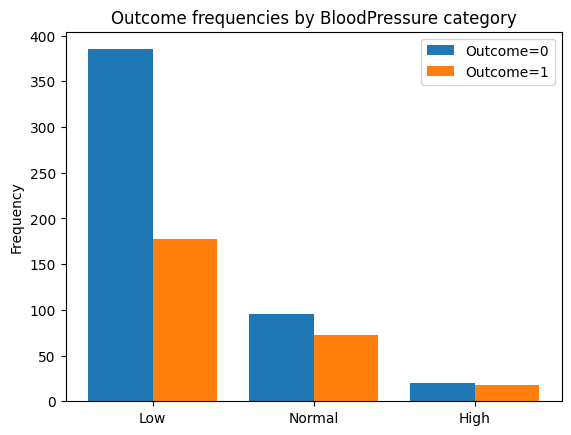

In [459]:
display(diabetes_df_B.head())

# دسته‌بندی فشار خون
BP_cat = ['Low',"Normal","High"]
new_features = []
for i in range(len(diabetes_df_B)):
    if diabetes_df_B.loc[i,'BloodPressure'] < 80:
        new_features.append(BP_cat[0])

    elif diabetes_df_B.loc[i,'BloodPressure'] >= 80 and diabetes_df_B.loc[i,'BloodPressure'] <= 90:
        new_features.append(BP_cat[1])

    elif diabetes_df_B.loc[i,'BloodPressure'] > 90:
        new_features.append(BP_cat[2])

diabetes_df_B['BloodPressure_Categorical'] = new_features

display(diabetes_df_B.head())

# فراوانی دسته‌ها
new_features_frq = Counter(new_features)
print(new_features_frq)

plt.bar(x=new_features_frq.keys(), height=new_features_frq.values())
total = sum(new_features_frq.values())
for i, (cat, count) in enumerate(new_features_frq.items()):
    percent = (count / total) * 100
    plt.text(i, count + 0.5, f"{percent:.1f}%", ha='center')

plt.show()

# فراوانی Outcome برای هر دسته فشار خون
low = diabetes_df_B[diabetes_df_B['BloodPressure_Categorical']=='Low']
low_frq = Counter(low['Outcome'])

normal = diabetes_df_B[diabetes_df_B['BloodPressure_Categorical']=='Normal']
normal_frq = Counter(normal['Outcome'])

high = diabetes_df_B[diabetes_df_B['BloodPressure_Categorical']=='High']
high_frq = Counter(high['Outcome'])

categories = ['Low',"Normal","High"]
outcome0 = [low_frq.get(0,0), normal_frq.get(0,0), high_frq.get(0,0)]
outcome1 = [low_frq.get(1,0), normal_frq.get(1,0), high_frq.get(1,0)]

x = range(len(categories))
plt.bar([i-0.2 for i in x], outcome0, width=0.4, label='Outcome=0')
plt.bar([i+0.2 for i in x], outcome1, width=0.4, label='Outcome=1')

plt.xticks(x, categories)
plt.ylabel("Frequency")
plt.title("Outcome frequencies by BloodPressure category")
plt.legend()
plt.show()

# One Hot Encoding

In [460]:
#Glucose cat
ohe = OneHotEncoder(handle_unknown='ignore')
gc_sparse = ohe.fit_transform(diabetes_df_B[['Glucose_Categorical']])
gc_df = pd.DataFrame(gc_sparse.toarray(), columns=ohe.get_feature_names_out(['Glucose_Categorical']))
# BloodPressure cat
ohe = OneHotEncoder(handle_unknown='ignore')
bp_sparse = ohe.fit_transform(diabetes_df_B[['BloodPressure_Categorical']])
bp_df = pd.DataFrame(bp_sparse.toarray(), columns=ohe.get_feature_names_out(['BloodPressure_Categorical']))

# BMI cat
ohe = OneHotEncoder(handle_unknown='ignore')
bmi_sparse = ohe.fit_transform(diabetes_df_B[["BMI_Categorical"]])
bmi_df = pd.DataFrame(data=bmi_sparse.toarray(),columns=ohe.get_feature_names_out(['BMI_Categorical']))
# age cat
ohe = OneHotEncoder(handle_unknown='ignore')
age_sparse = ohe.fit_transform(diabetes_df_B[['Age_Categorical']])
age_df = pd.DataFrame(data=age_sparse.toarray(),columns=ohe.get_feature_names_out(['Age_Categorical']))


concate_encoding_result = pd.concat([gc_df,bp_df,bmi_df,age_df],axis=1,ignore_index=True)
concate_encoding_result.columns = [list(gc_df.columns)+list(bp_df.columns)+list(bmi_df.columns)+list(age_df.columns)]

diabetes_df_B_col = list(diabetes_df_B.columns)
diabetes_df_B = pd.concat([diabetes_df_B,concate_encoding_result],axis=1)


diabetes_df_B.columns = diabetes_df_B_col+[i[0] for i in concate_encoding_result.columns]
# drop cat features
out_come = diabetes_df_B.Outcome
diabetes_df_B.drop(inplace=True,axis=1,columns=['Glucose_Categorical','BloodPressure_Categorical','BMI_Categorical','Age_Categorical','Outcome'])
diabetes_df_B['Outcome'] = out_come
display(diabetes_df_B)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Insulin_to_Glucose_Ratio,Glucose_Categorical_Diabetic,Glucose_Categorical_Normal,Glucose_Categorical_Prediabetes,BloodPressure_Categorical_High,BloodPressure_Categorical_Low,BloodPressure_Categorical_Normal,BMI_Categorical_Normal,BMI_Categorical_Obese,BMI_Categorical_Overweight,BMI_Categorical_Underweight,Age_Categorical_Elderly,Age_Categorical_Middle_Aged,Age_Categorical_Senior,Age_Categorical_Young,Outcome
0,6,148.0,72.0,35.000000,100.335821,33.6,0.627,50,0.677945,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1,1,85.0,66.0,29.000000,68.792000,26.6,0.351,31,0.809318,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
2,8,183.0,64.0,22.164179,100.335821,23.3,0.672,32,0.548283,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,1.056180,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1.226277,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,1.782178,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0
764,2,122.0,70.0,27.000000,68.792000,36.8,0.340,27,0.563869,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0.925620,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
766,1,126.0,60.0,22.164179,100.335821,30.1,0.349,47,0.796316,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1


# Scaling

In [461]:
X_train,X_test,y_train,y_test = train_test_split\
    (diabetes_df_B.drop('Outcome',axis=1),diabetes_df_B['Outcome'],test_size=0.3,random_state=42,stratify=diabetes_df_B['Outcome'])

print(X_train.shape)
print(y_train.shape,'\n',y_train.value_counts(normalize=True) * 100)
print(X_test.shape)
print(y_test.shape,"\n",y_test.value_counts(normalize=True) * 100)

(537, 23)
(537,) 
 Outcome
0    65.176909
1    34.823091
Name: proportion, dtype: float64
(231, 23)
(231,) 
 Outcome
0    64.935065
1    35.064935
Name: proportion, dtype: float64


استرتیفای لیبل های دیتا ست اصلی رو دریافت میکنه سهم یا درصد هر کلاس از کل لیبل ها رو به دست میاره ، و همین درصد رو روی داده های تست و ترین پیاده میکنه 

یعنی اگر در دیتاست اصلی 90 % داده ها کلاس 1 و 10% داده ها کلاس2 هستند


در داده های ترین هم  90 % داده ها کلاس 1 و 10% داده ها کلاس2 هستند

در داده های تست هم  90 % داده ها کلاس 1 و 10% داده ها کلاس2 هستن

این باعث میشه داده های تست و ترین نماینده های خوبی برای دیتاست اصلی باشن 

In [462]:
num_features = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
    'BMI', 'DiabetesPedigreeFunction', 'Age', 'Insulin_to_Glucose_Ratio']

scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

In [463]:
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)
display(X_train.head())
display(X_test.head())
display(y_train.head())
display(y_test.head())



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Insulin_to_Glucose_Ratio,Glucose_Categorical_Diabetic,Glucose_Categorical_Normal,Glucose_Categorical_Prediabetes,BloodPressure_Categorical_High,BloodPressure_Categorical_Low,BloodPressure_Categorical_Normal,BMI_Categorical_Normal,BMI_Categorical_Obese,BMI_Categorical_Overweight,BMI_Categorical_Underweight,Age_Categorical_Elderly,Age_Categorical_Middle_Aged,Age_Categorical_Senior,Age_Categorical_Young
0,0.931383,2.084569,0.974634,0.722111,-0.189107,0.430263,-0.374779,0.632129,-0.738850,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.632606,-1.221794,0.482484,-0.747131,-0.553077,-0.208620,-0.294168,0.716992,-0.243752,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.562502,-0.520444,-0.665866,0.942454,0.026250,-0.312624,2.745172,0.038086,0.343814,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.562502,-0.720830,-1.486116,0.171256,-0.135289,0.771990,0.052162,-0.810548,0.207591,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.333829,-0.587239,0.154384,-0.747131,-0.553077,-0.565205,-0.977870,1.226172,-0.521022,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Insulin_to_Glucose_Ratio,Glucose_Categorical_Diabetic,Glucose_Categorical_Normal,Glucose_Categorical_Prediabetes,BloodPressure_Categorical_High,BloodPressure_Categorical_Low,BloodPressure_Categorical_Normal,BMI_Categorical_Normal,BMI_Categorical_Obese,BMI_Categorical_Overweight,BMI_Categorical_Underweight,Age_Categorical_Elderly,Age_Categorical_Middle_Aged,Age_Categorical_Senior,Age_Categorical_Young
0,-0.263725,0.281099,0.482484,-0.379600,-0.435292,-0.624636,-0.470318,0.038086,-0.621854,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.035052,-0.420251,-0.665866,1.933994,-0.204521,0.326258,1.267301,-0.640821,-0.058215,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.126492,0.715267,1.794885,0.722111,0.337791,0.593698,-0.676324,1.480762,0.153169,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.035052,0.748665,0.810584,0.611940,-0.189107,0.875994,0.219355,0.292676,-0.454797,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.230161,-0.553842,2.287035,1.052625,-0.189107,1.589165,-0.721108,0.971582,0.030527,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


0    1
1    0
2    0
3    0
4    0
Name: Outcome, dtype: int64

0    1
1    1
2    1
3    1
4    1
Name: Outcome, dtype: int64

# Linear SVM

➖➖train➖➖
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       350
           1       0.75      0.63      0.68       187

    accuracy                           0.80       537
   macro avg       0.79      0.76      0.77       537
weighted avg       0.80      0.80      0.79       537

➖➖test➖➖
               precision    recall  f1-score   support

           0       0.77      0.85      0.81       150
           1       0.66      0.54      0.59        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231



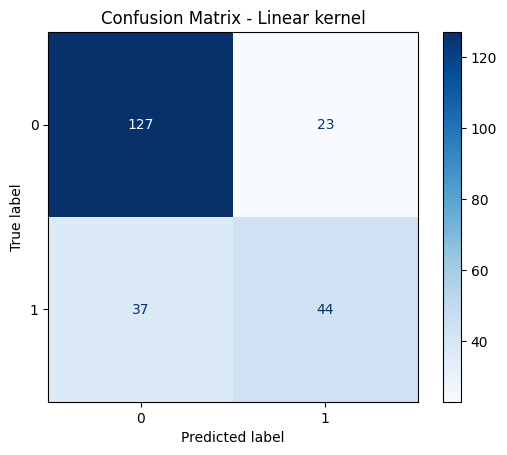

In [464]:
linear_svm = SVC(kernel='linear',C=1,random_state=42)

linear_svm.fit(X_train,y_train)

y_train_pred = linear_svm.predict(X_train)

print('➖➖train➖➖\n',classification_report(y_train,y_train_pred))
y_pred = linear_svm.predict(X_test)
print('➖➖test➖➖\n',classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=linear_svm.classes_)
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix - Linear kernel")
plt.show()


دقت روی داده های ترین کمی بالا تر بوده ، اما نه به قدری که نشانه آورفیتینگ باشد ؛ در کل دقت پیش بینی عدد متوسطی بوده و نه انقدر بد است که تصادفی باشد نه انقدر خوب است که پیش بینی دقیق و قابل اعتمادی داشته باشد

#   RBF

➖➖train➖➖
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       350
           1       0.86      0.75      0.80       187

    accuracy                           0.87       537
   macro avg       0.87      0.84      0.85       537
weighted avg       0.87      0.87      0.87       537

➖➖test➖➖
               precision    recall  f1-score   support

           0       0.78      0.89      0.83       150
           1       0.73      0.54      0.62        81

    accuracy                           0.77       231
   macro avg       0.76      0.72      0.73       231
weighted avg       0.77      0.77      0.76       231



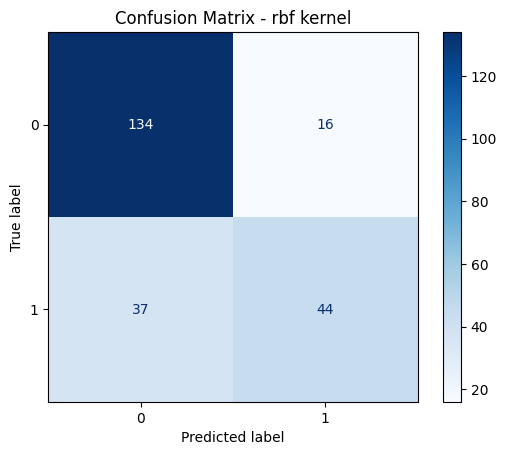

In [465]:
linear_svm = SVC(kernel='rbf',C=1,random_state=42)

linear_svm.fit(X_train,y_train)

y_train_pred = linear_svm.predict(X_train)

print('➖➖train➖➖\n',classification_report(y_train,y_train_pred))
y_pred = linear_svm.predict(X_test)
print('➖➖test➖➖\n',classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=linear_svm.classes_)
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix - rbf kernel")
plt.show()


دقت بالاتر رفته حدود 10 واحد در هر معیار ، و این نشان دهنده این است که بردن مسئله به ابعاد بالاتر توسط آر بی اف توانسته به تفکیک کلاس ها کمک کند 

➖➖train➖➖
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       350
           1       0.92      0.70      0.79       187

    accuracy                           0.87       537
   macro avg       0.89      0.83      0.85       537
weighted avg       0.88      0.87      0.87       537

➖➖test➖➖
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       150
           1       0.76      0.52      0.62        81

    accuracy                           0.77       231
   macro avg       0.77      0.72      0.73       231
weighted avg       0.77      0.77      0.76       231



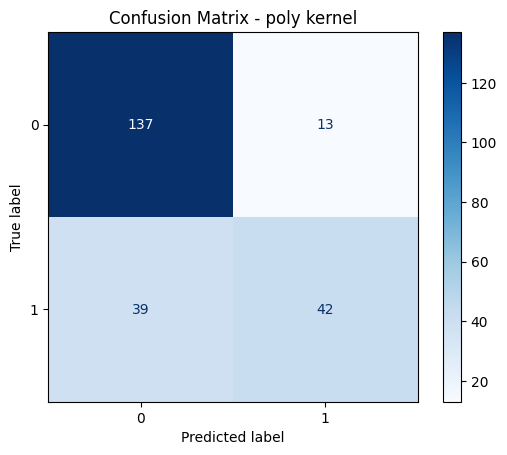

In [466]:
linear_svm = SVC(kernel='poly',degree=3,C=1,random_state=42)

linear_svm.fit(X_train,y_train)

y_train_pred = linear_svm.predict(X_train)

print('➖➖train➖➖\n',classification_report(y_train,y_train_pred))
y_pred = linear_svm.predict(X_test)
print('➖➖test➖➖\n',classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=linear_svm.classes_)
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix - poly kernel")
plt.show()


بهترین عملکرد در تشخیص بیماران رو کرنل پولی داشته البته بازم عدد قابل قبولی نیست و تعداد زیادی از بیماران از دست رفتن 

با کرنل پولینومیال دقت یک واحد حدودا از آر بی اف بالا تر رفت 

اما ریکال در داده های تست کاهش زیادی داشته برای کلاس 1 و این نشان دهنده تاثیر بالانس نبودن سهم کلاس ها و همچنین اورفیتینگ شدن مدل است 

معیار ریکال نشان دهنده موارد تشخیص داده نشده از هر کلاس است پس در کلاس 1 یا اوت کام 1 مهم ترین معیار برای ما بالاتر بردن ریکال است چرا که نمیخواهیم مدل افراد دیابتی را از دست بدهد و همان طور که به نظر میرسد مدل عملکرد ضعیفی در امتیاز ریکال که برای ما مهم تر است داشته 

# C stratejy

In [467]:
# نمایش چند ردیف اول
display(diabetes_df_C.head())

# دسته‌بندی Glucose
Glucose_cat = ['Normal',"Prediabetes","Diabetic"]
new_features = []
for i in range(len(diabetes_df_C)):
    if diabetes_df_C.loc[i,'Glucose'] < 100 :
        new_features.append(Glucose_cat[0])
    elif diabetes_df_C.loc[i,'Glucose'] >= 100 and diabetes_df_C.loc[i,'Glucose'] < 125:
        new_features.append(Glucose_cat[1])
    elif diabetes_df_C.loc[i,'Glucose'] >= 125:
        new_features.append(Glucose_cat[2])

diabetes_df_C['Glucose_Categorical'] = new_features
display(diabetes_df_C.head())

# دسته‌بندی BMI
BMI_cat = ['Underweight',"Normal","Overweight","Obese"]
new_features = []
for i in range(len(diabetes_df_C)):
    if diabetes_df_C.loc[i,'BMI'] < 18.5 :
        new_features.append(BMI_cat[0])
    elif diabetes_df_C.loc[i,'BMI'] >= 18.5 and diabetes_df_C.loc[i,'BMI'] < 25:
        new_features.append(BMI_cat[1])
    elif diabetes_df_C.loc[i,'BMI'] >= 25 and diabetes_df_C.loc[i,'BMI'] < 30:
        new_features.append(BMI_cat[2])
    elif diabetes_df_C.loc[i,'BMI'] >= 30:
        new_features.append(BMI_cat[3])

diabetes_df_C['BMI_Categorical'] = new_features
display(diabetes_df_C.head())

# دسته‌بندی Age
Age_cat = ['Young',"Middle_Aged","Senior","Elderly"]
new_features = []
for i in range(len(diabetes_df_C)):
    if diabetes_df_C.loc[i,'Age'] < 30 and diabetes_df_C.loc[i,'Age'] >= 21:
        new_features.append(Age_cat[0])
    elif diabetes_df_C.loc[i,'Age'] >= 30 and diabetes_df_C.loc[i,'Age'] <= 45:
        new_features.append(Age_cat[1])
    elif diabetes_df_C.loc[i,'Age'] > 45 and diabetes_df_C.loc[i,'Age'] < 60:
        new_features.append(Age_cat[2])
    elif diabetes_df_C.loc[i,'Age'] >= 60:
        new_features.append(Age_cat[3])

diabetes_df_C['Age_Categorical'] = new_features
display(diabetes_df_C.head())

# نسبت انسولین به گلوکز
diabetes_df_C['Insulin_to_Glucose_Ratio'] = diabetes_df_C['Insulin'] / diabetes_df_C['Glucose']

# دسته‌بندی فشار خون
BP_cat = ['Low',"Normal","High"]
new_features = []
for i in range(len(diabetes_df_C)):
    if diabetes_df_C.loc[i,'BloodPressure'] < 80:
        new_features.append(BP_cat[0])
    elif diabetes_df_C.loc[i,'BloodPressure'] >= 80 and diabetes_df_C.loc[i,'BloodPressure'] <= 90:
        new_features.append(BP_cat[1])
    elif diabetes_df_C.loc[i,'BloodPressure'] > 90:
        new_features.append(BP_cat[2])

diabetes_df_C['BloodPressure_Categorical'] = new_features
display(diabetes_df_C.head())

# وان‌هات انکودینگ
ohe = OneHotEncoder(handle_unknown='ignore')
gc_sparse = ohe.fit_transform(diabetes_df_C[['Glucose_Categorical']])
gc_df = pd.DataFrame(gc_sparse.toarray(), columns=ohe.get_feature_names_out(['Glucose_Categorical']))

ohe = OneHotEncoder(handle_unknown='ignore')
bp_sparse = ohe.fit_transform(diabetes_df_C[['BloodPressure_Categorical']])
bp_df = pd.DataFrame(bp_sparse.toarray(), columns=ohe.get_feature_names_out(['BloodPressure_Categorical']))

ohe = OneHotEncoder(handle_unknown='ignore')
bmi_sparse = ohe.fit_transform(diabetes_df_C[['BMI_Categorical']])
bmi_df = pd.DataFrame(bmi_sparse.toarray(), columns=ohe.get_feature_names_out(['BMI_Categorical']))

ohe = OneHotEncoder(handle_unknown='ignore')
age_sparse = ohe.fit_transform(diabetes_df_C[['Age_Categorical']])
age_df = pd.DataFrame(age_sparse.toarray(), columns=ohe.get_feature_names_out(['Age_Categorical']))

# ترکیب همه‌ی انکودینگ‌ها
concate_encoding_result = pd.concat([gc_df,bp_df,bmi_df,age_df],axis=1)
diabetes_df_C = pd.concat([diabetes_df_C, concate_encoding_result], axis=1)

# حذف فیچرهای دسته‌ای اصلی
out_come = diabetes_df_C['Outcome']
diabetes_df_C.drop(columns=['Glucose_Categorical','BloodPressure_Categorical','BMI_Categorical','Age_Categorical','Outcome'], inplace=True)
diabetes_df_C['Outcome'] = out_come

display(diabetes_df_C.head())

# Train/Test Split
X_train,X_test,y_train,y_test = train_test_split(
    diabetes_df_C.drop('Outcome',axis=1),
    diabetes_df_C['Outcome'],
    test_size=0.3,
    random_state=42,
    stratify=diabetes_df_C['Outcome']
)

print(X_train.shape)
print(y_train.shape,'\n',y_train.value_counts(normalize=True) * 100)
print(X_test.shape)
print(y_test.shape,"\n",y_test.value_counts(normalize=True) * 100)

# Standard Scaling فقط روی فیچرهای عددی
num_features = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
    'BMI', 'DiabetesPedigreeFunction', 'Age', 'Insulin_to_Glucose_Ratio'
]

scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

# ریست ایندکس
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

display(X_train.head())
display(X_test.head())
display(y_train.head())
display(y_test.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,25.8,164.6,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_Categorical
0,6.0,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1.0,Diabetic
1,1.0,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0.0,Normal
2,8.0,183.0,64.0,25.8,164.6,23.3,0.672,32.0,1.0,Diabetic
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,Normal
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,Diabetic


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_Categorical,BMI_Categorical
0,6.0,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1.0,Diabetic,Obese
1,1.0,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0.0,Normal,Overweight
2,8.0,183.0,64.0,25.8,164.6,23.3,0.672,32.0,1.0,Diabetic,Normal
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,Normal,Overweight
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,Diabetic,Obese


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_Categorical,BMI_Categorical,Age_Categorical
0,6.0,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1.0,Diabetic,Obese,Senior
1,1.0,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0.0,Normal,Overweight,Middle_Aged
2,8.0,183.0,64.0,25.8,164.6,23.3,0.672,32.0,1.0,Diabetic,Normal,Middle_Aged
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,Normal,Overweight,Young
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,Diabetic,Obese,Middle_Aged


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_Categorical,BMI_Categorical,Age_Categorical,Insulin_to_Glucose_Ratio,BloodPressure_Categorical
0,6.0,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1.0,Diabetic,Obese,Senior,1.141892,Low
1,1.0,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0.0,Normal,Overweight,Middle_Aged,0.689412,Low
2,8.0,183.0,64.0,25.8,164.6,23.3,0.672,32.0,1.0,Diabetic,Normal,Middle_Aged,0.899454,Low
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,Normal,Overweight,Young,1.056180,Low
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,Diabetic,Obese,Middle_Aged,1.226277,Low


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Insulin_to_Glucose_Ratio,Glucose_Categorical_Diabetic,Glucose_Categorical_Normal,Glucose_Categorical_Prediabetes,BloodPressure_Categorical_High,BloodPressure_Categorical_Low,BloodPressure_Categorical_Normal,BMI_Categorical_Normal,BMI_Categorical_Obese,BMI_Categorical_Overweight,BMI_Categorical_Underweight,Age_Categorical_Elderly,Age_Categorical_Middle_Aged,Age_Categorical_Senior,Age_Categorical_Young,Outcome
0,6.0,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1.141892,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0.689412,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,8.0,183.0,64.0,25.8,164.6,23.3,0.672,32.0,0.899454,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,1.056180,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.226277,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


(537, 23)
(537,) 
 Outcome
0.0    65.176909
1.0    34.823091
Name: proportion, dtype: float64
(231, 23)
(231,) 
 Outcome
0.0    64.935065
1.0    35.064935
Name: proportion, dtype: float64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Insulin_to_Glucose_Ratio,Glucose_Categorical_Diabetic,Glucose_Categorical_Normal,Glucose_Categorical_Prediabetes,BloodPressure_Categorical_High,BloodPressure_Categorical_Low,BloodPressure_Categorical_Normal,BMI_Categorical_Normal,BMI_Categorical_Obese,BMI_Categorical_Overweight,BMI_Categorical_Underweight,Age_Categorical_Elderly,Age_Categorical_Middle_Aged,Age_Categorical_Senior,Age_Categorical_Young
0,0.931383,2.084732,0.955350,0.455044,0.421268,0.431167,-0.374779,0.632129,-0.296183,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.632606,-1.217769,0.465622,-0.244477,-0.928558,-0.207444,-0.294168,0.716992,-0.796781,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.562502,-0.517238,-0.677077,0.680696,-0.328635,-0.311404,2.745172,0.038086,-0.109898,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.562502,-0.717390,-1.493290,-0.109086,-0.480790,0.772750,0.052162,-0.810548,-0.244008,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.333829,-0.583956,0.139136,-0.109086,-0.069973,-0.563879,-0.977870,1.226172,0.352455,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Insulin_to_Glucose_Ratio,Glucose_Categorical_Diabetic,Glucose_Categorical_Normal,Glucose_Categorical_Prediabetes,BloodPressure_Categorical_High,BloodPressure_Categorical_Low,BloodPressure_Categorical_Normal,BMI_Categorical_Normal,BMI_Categorical_Obese,BMI_Categorical_Overweight,BMI_Categorical_Underweight,Age_Categorical_Elderly,Age_Categorical_Middle_Aged,Age_Categorical_Senior,Age_Categorical_Young
0,-0.263725,0.283368,0.465622,-0.673216,-0.763362,-0.623284,-0.470318,0.038086,-1.060595,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.035052,-0.417163,-0.677077,1.696129,-0.545999,0.327207,1.267301,-0.640821,-0.505694,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.126492,0.717030,1.771563,0.455044,-0.035195,0.594533,-0.676324,1.480762,-0.297587,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.035052,0.750388,0.792107,0.342218,0.314760,0.876710,0.219355,0.292676,0.102154,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.230161,-0.550597,2.261291,0.793522,-0.313420,1.589578,-0.721108,0.971582,-0.065543,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


0    1.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Outcome, dtype: float64

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Outcome, dtype: float64

➖➖train➖➖
               precision    recall  f1-score   support

         0.0       0.80      0.90      0.85       350
         1.0       0.75      0.58      0.65       187

    accuracy                           0.79       537
   macro avg       0.77      0.74      0.75       537
weighted avg       0.78      0.79      0.78       537

➖➖test➖➖
               precision    recall  f1-score   support

         0.0       0.77      0.86      0.81       150
         1.0       0.67      0.52      0.58        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231



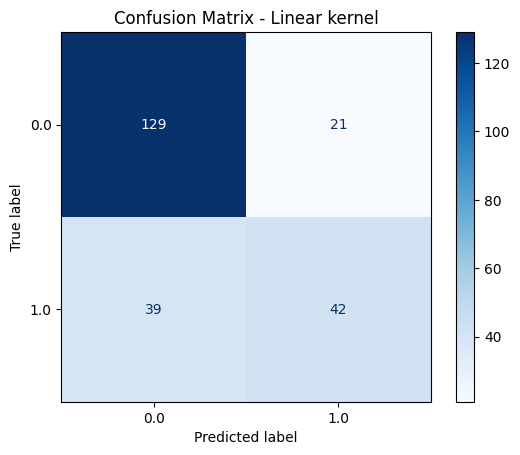

➖➖train➖➖
               precision    recall  f1-score   support

         0.0       0.84      0.93      0.89       350
         1.0       0.85      0.68      0.75       187

    accuracy                           0.85       537
   macro avg       0.85      0.81      0.82       537
weighted avg       0.85      0.85      0.84       537

➖➖test➖➖
               precision    recall  f1-score   support

         0.0       0.76      0.86      0.81       150
         1.0       0.66      0.49      0.56        81

    accuracy                           0.73       231
   macro avg       0.71      0.68      0.68       231
weighted avg       0.72      0.73      0.72       231



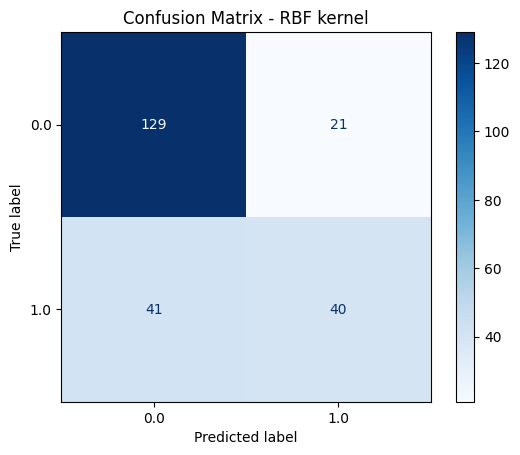

➖➖train➖➖
               precision    recall  f1-score   support

         0.0       0.82      0.97      0.89       350
         1.0       0.91      0.61      0.73       187

    accuracy                           0.84       537
   macro avg       0.86      0.79      0.81       537
weighted avg       0.85      0.84      0.83       537

➖➖test➖➖
               precision    recall  f1-score   support

         0.0       0.76      0.88      0.82       150
         1.0       0.69      0.49      0.58        81

    accuracy                           0.74       231
   macro avg       0.73      0.69      0.70       231
weighted avg       0.74      0.74      0.73       231



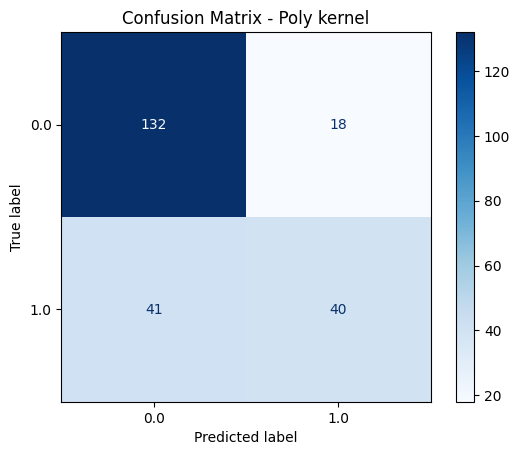

In [468]:


# Linear SVM
svm_linear = SVC(kernel='linear', C=1, random_state=42)
svm_linear.fit(X_train, y_train)

y_train_pred = svm_linear.predict(X_train)
print('➖➖train➖➖\n', classification_report(y_train, y_train_pred))
y_pred = svm_linear.predict(X_test)
print('➖➖test➖➖\n', classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_linear.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Linear kernel")
plt.show()

# RBF SVM
svm_rbf = SVC(kernel='rbf', C=1, random_state=42)
svm_rbf.fit(X_train, y_train)

y_train_pred = svm_rbf.predict(X_train)
print('➖➖train➖➖\n', classification_report(y_train, y_train_pred))
y_pred = svm_rbf.predict(X_test)
print('➖➖test➖➖\n', classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_rbf.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - RBF kernel")
plt.show()

# Polynomial SVM
svm_poly = SVC(kernel='poly', degree=3, C=1, random_state=42)
svm_poly.fit(X_train, y_train)

y_train_pred = svm_poly.predict(X_train)
print('➖➖train➖➖\n', classification_report(y_train, y_train_pred))
y_pred = svm_poly.predict(X_test)
print('➖➖test➖➖\n', classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_poly.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Poly kernel")
plt.show()

# A stratejy

In [469]:
# نمایش چند ردیف اول
display(diabetes_df_A.head())

# دسته‌بندی Glucose
Glucose_cat = ['Normal',"Prediabetes","Diabetic"]
new_features = []
for i in range(len(diabetes_df_A)):
    if diabetes_df_A.loc[i,'Glucose'] < 100 :
        new_features.append(Glucose_cat[0])
    elif diabetes_df_A.loc[i,'Glucose'] >= 100 and diabetes_df_A.loc[i,'Glucose'] < 125:
        new_features.append(Glucose_cat[1])
    elif diabetes_df_A.loc[i,'Glucose'] >= 125:
        new_features.append(Glucose_cat[2])

diabetes_df_A['Glucose_Categorical'] = new_features
display(diabetes_df_A.head())

# دسته‌بندی BMI
BMI_cat = ['Underweight',"Normal","Overweight","Obese"]
new_features = []
for i in range(len(diabetes_df_A)):
    if diabetes_df_A.loc[i,'BMI'] < 18.5 :
        new_features.append(BMI_cat[0])
    elif diabetes_df_A.loc[i,'BMI'] >= 18.5 and diabetes_df_A.loc[i,'BMI'] < 25:
        new_features.append(BMI_cat[1])
    elif diabetes_df_A.loc[i,'BMI'] >= 25 and diabetes_df_A.loc[i,'BMI'] < 30:
        new_features.append(BMI_cat[2])
    elif diabetes_df_A.loc[i,'BMI'] >= 30:
        new_features.append(BMI_cat[3])

diabetes_df_A['BMI_Categorical'] = new_features
display(diabetes_df_A.head())

# دسته‌بندی Age
Age_cat = ['Young',"Middle_Aged","Senior","Elderly"]
new_features = []
for i in range(len(diabetes_df_A)):
    if diabetes_df_A.loc[i,'Age'] < 30 and diabetes_df_A.loc[i,'Age'] >= 21:
        new_features.append(Age_cat[0])
    elif diabetes_df_A.loc[i,'Age'] >= 30 and diabetes_df_A.loc[i,'Age'] <= 45:
        new_features.append(Age_cat[1])
    elif diabetes_df_A.loc[i,'Age'] > 45 and diabetes_df_A.loc[i,'Age'] < 60:
        new_features.append(Age_cat[2])
    elif diabetes_df_A.loc[i,'Age'] >= 60:
        new_features.append(Age_cat[3])

diabetes_df_A['Age_Categorical'] = new_features
display(diabetes_df_A.head())

# نسبت انسولین به گلوکز
diabetes_df_A['Insulin_to_Glucose_Ratio'] = diabetes_df_A['Insulin'] / diabetes_df_A['Glucose']

# دسته‌بندی فشار خون
BP_cat = ['Low',"Normal","High"]
new_features = []
for i in range(len(diabetes_df_A)):
    if diabetes_df_A.loc[i,'BloodPressure'] < 80:
        new_features.append(BP_cat[0])
    elif diabetes_df_A.loc[i,'BloodPressure'] >= 80 and diabetes_df_A.loc[i,'BloodPressure'] <= 90:
        new_features.append(BP_cat[1])
    elif diabetes_df_A.loc[i,'BloodPressure'] > 90:
        new_features.append(BP_cat[2])

diabetes_df_A['BloodPressure_Categorical'] = new_features
display(diabetes_df_A.head())

# وان‌هات انکودینگ
ohe = OneHotEncoder(handle_unknown='ignore')
gc_sparse = ohe.fit_transform(diabetes_df_A[['Glucose_Categorical']])
gc_df = pd.DataFrame(gc_sparse.toarray(), columns=ohe.get_feature_names_out(['Glucose_Categorical']))

ohe = OneHotEncoder(handle_unknown='ignore')
bp_sparse = ohe.fit_transform(diabetes_df_A[['BloodPressure_Categorical']])
bp_df = pd.DataFrame(bp_sparse.toarray(), columns=ohe.get_feature_names_out(['BloodPressure_Categorical']))

ohe = OneHotEncoder(handle_unknown='ignore')
bmi_sparse = ohe.fit_transform(diabetes_df_A[['BMI_Categorical']])
bmi_df = pd.DataFrame(bmi_sparse.toarray(), columns=ohe.get_feature_names_out(['BMI_Categorical']))

ohe = OneHotEncoder(handle_unknown='ignore')
age_sparse = ohe.fit_transform(diabetes_df_A[['Age_Categorical']])
age_df = pd.DataFrame(age_sparse.toarray(), columns=ohe.get_feature_names_out(['Age_Categorical']))

# ترکیب همه‌ی انکودینگ‌ها
concate_encoding_result = pd.concat([gc_df,bp_df,bmi_df,age_df],axis=1)
diabetes_df_A = pd.concat([diabetes_df_A, concate_encoding_result], axis=1)

# حذف فیچرهای دسته‌ای اصلی
out_come = diabetes_df_A['Outcome']
diabetes_df_A.drop(columns=['Glucose_Categorical','BloodPressure_Categorical','BMI_Categorical','Age_Categorical','Outcome'], inplace=True)
diabetes_df_A['Outcome'] = out_come

display(diabetes_df_A.head())

# Train/Test Split
X_train,X_test,y_train,y_test = train_test_split(
    diabetes_df_A.drop('Outcome',axis=1),
    diabetes_df_A['Outcome'],
    test_size=0.3,
    random_state=42,
    stratify=diabetes_df_A['Outcome']
)

print(X_train.shape)
print(y_train.shape,'\n',y_train.value_counts(normalize=True) * 100)
print(X_test.shape)
print(y_test.shape,"\n",y_test.value_counts(normalize=True) * 100)

# Standard Scaling فقط روی فیچرهای عددی
num_features = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
    'BMI', 'DiabetesPedigreeFunction', 'Age', 'Insulin_to_Glucose_Ratio'
]

scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

# ریست ایندکس
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

display(X_train.head())
display(X_test.head())
display(y_train.head())
display(y_test.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_Categorical
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,Diabetic
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,Normal
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,Diabetic
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,Normal
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,Diabetic


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_Categorical,BMI_Categorical
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,Diabetic,Obese
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,Normal,Overweight
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,Diabetic,Normal
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,Normal,Overweight
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,Diabetic,Obese


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_Categorical,BMI_Categorical,Age_Categorical
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,Diabetic,Obese,Senior
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,Normal,Overweight,Middle_Aged
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,Diabetic,Normal,Middle_Aged
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,Normal,Overweight,Young
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,Diabetic,Obese,Middle_Aged


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_Categorical,BMI_Categorical,Age_Categorical,Insulin_to_Glucose_Ratio,BloodPressure_Categorical
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,Diabetic,Obese,Senior,1.051002,Low
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,Normal,Overweight,Middle_Aged,1.829979,Low
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,Diabetic,Normal,Middle_Aged,0.849990,Low
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,Normal,Overweight,Young,1.056180,Low
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,Diabetic,Obese,Middle_Aged,1.226277,Low


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Insulin_to_Glucose_Ratio,Glucose_Categorical_Diabetic,Glucose_Categorical_Normal,Glucose_Categorical_Prediabetes,BloodPressure_Categorical_High,BloodPressure_Categorical_Low,BloodPressure_Categorical_Normal,BMI_Categorical_Normal,BMI_Categorical_Obese,BMI_Categorical_Overweight,BMI_Categorical_Underweight,Age_Categorical_Elderly,Age_Categorical_Middle_Aged,Age_Categorical_Senior,Age_Categorical_Young,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1.051002,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,1.829979,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,0.849990,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,1.056180,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1.226277,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1


(537, 23)
(537,) 
 Outcome
0    65.176909
1    34.823091
Name: proportion, dtype: float64
(231, 23)
(231,) 
 Outcome
0    64.935065
1    35.064935
Name: proportion, dtype: float64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Insulin_to_Glucose_Ratio,Glucose_Categorical_Diabetic,Glucose_Categorical_Normal,Glucose_Categorical_Prediabetes,BloodPressure_Categorical_High,BloodPressure_Categorical_Low,BloodPressure_Categorical_Normal,BMI_Categorical_Normal,BMI_Categorical_Obese,BMI_Categorical_Overweight,BMI_Categorical_Underweight,Age_Categorical_Elderly,Age_Categorical_Middle_Aged,Age_Categorical_Senior,Age_Categorical_Young
0,0.931383,2.085753,0.965518,0.493042,0.037188,0.428566,-0.374779,0.632129,-0.784137,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.632606,-1.222867,0.472716,0.026921,0.037188,-0.210902,-0.294168,0.716992,1.063152,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.562502,-0.521038,-0.677154,0.735398,-0.427083,-0.315001,2.745172,0.038086,-0.263931,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.562502,-0.721561,-1.498489,-0.112848,-0.604925,0.770608,0.052162,-0.810548,-0.400218,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.333829,-0.587879,0.144182,0.026921,0.037188,-0.567814,-0.977870,1.226172,0.435906,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Insulin_to_Glucose_Ratio,Glucose_Categorical_Diabetic,Glucose_Categorical_Normal,Glucose_Categorical_Prediabetes,BloodPressure_Categorical_High,BloodPressure_Categorical_Low,BloodPressure_Categorical_Normal,BMI_Categorical_Normal,BMI_Categorical_Obese,BMI_Categorical_Overweight,BMI_Categorical_Underweight,Age_Categorical_Elderly,Age_Categorical_Middle_Aged,Age_Categorical_Senior,Age_Categorical_Young
0,-0.263725,0.281051,0.472716,-0.718738,-0.935202,-0.627300,-0.470318,0.038086,-1.230061,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.035052,-0.420777,-0.677154,1.825999,-0.681143,0.324467,1.267301,-0.640821,-0.666152,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.126492,0.715516,1.786853,0.493042,-0.084103,0.592151,-0.676324,1.480762,-0.454667,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.035052,0.748937,0.801250,0.371864,0.037188,0.874707,0.219355,0.292676,-0.343566,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.230161,-0.554459,2.279654,0.856576,0.037188,1.588532,-0.721108,0.971582,0.409182,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


0    1
1    0
2    0
3    0
4    0
Name: Outcome, dtype: int64

0    1
1    1
2    1
3    1
4    1
Name: Outcome, dtype: int64

➖➖train➖➖
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       350
           1       0.75      0.58      0.66       187

    accuracy                           0.79       537
   macro avg       0.78      0.74      0.75       537
weighted avg       0.78      0.79      0.78       537

➖➖test➖➖
               precision    recall  f1-score   support

           0       0.77      0.85      0.81       150
           1       0.66      0.52      0.58        81

    accuracy                           0.74       231
   macro avg       0.71      0.69      0.69       231
weighted avg       0.73      0.74      0.73       231



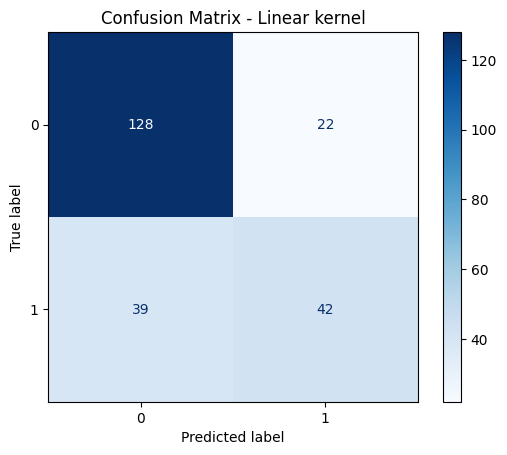

➖➖train➖➖
               precision    recall  f1-score   support

           0       0.84      0.94      0.89       350
           1       0.86      0.66      0.75       187

    accuracy                           0.84       537
   macro avg       0.85      0.80      0.82       537
weighted avg       0.84      0.84      0.84       537

➖➖test➖➖
               precision    recall  f1-score   support

           0       0.76      0.88      0.81       150
           1       0.68      0.48      0.57        81

    accuracy                           0.74       231
   macro avg       0.72      0.68      0.69       231
weighted avg       0.73      0.74      0.73       231



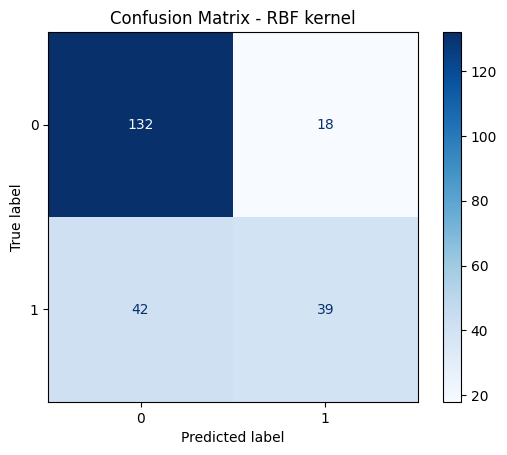

➖➖train➖➖
               precision    recall  f1-score   support

           0       0.82      0.97      0.89       350
           1       0.91      0.61      0.73       187

    accuracy                           0.84       537
   macro avg       0.87      0.79      0.81       537
weighted avg       0.85      0.84      0.83       537

➖➖test➖➖
               precision    recall  f1-score   support

           0       0.75      0.90      0.82       150
           1       0.71      0.46      0.56        81

    accuracy                           0.74       231
   macro avg       0.73      0.68      0.69       231
weighted avg       0.74      0.74      0.73       231



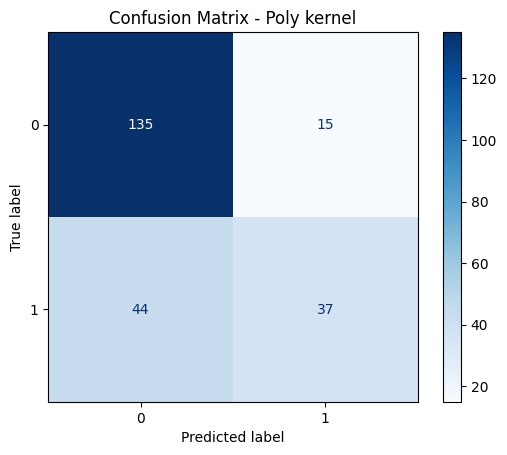

In [470]:


# Linear SVM
svm_linear = SVC(kernel='linear', C=1, random_state=42)
svm_linear.fit(X_train, y_train)

y_train_pred = svm_linear.predict(X_train)
print('➖➖train➖➖\n', classification_report(y_train, y_train_pred))
y_pred = svm_linear.predict(X_test)
print('➖➖test➖➖\n', classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_linear.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Linear kernel")
plt.show()

# RBF SVM
svm_rbf = SVC(kernel='rbf', C=1, random_state=42)
svm_rbf.fit(X_train, y_train)

y_train_pred = svm_rbf.predict(X_train)
print('➖➖train➖➖\n', classification_report(y_train, y_train_pred))
y_pred = svm_rbf.predict(X_test)
print('➖➖test➖➖\n', classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_rbf.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - RBF kernel")
plt.show()

# Polynomial SVM
svm_poly = SVC(kernel='poly', degree=3, C=1, random_state=42)
svm_poly.fit(X_train, y_train)

y_train_pred = svm_poly.predict(X_train)
print('➖➖train➖➖\n', classification_report(y_train, y_train_pred))
y_pred = svm_poly.predict(X_test)
print('➖➖test➖➖\n', classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_poly.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Poly kernel")
plt.show()

مقایسه تمام خروجی ها : 

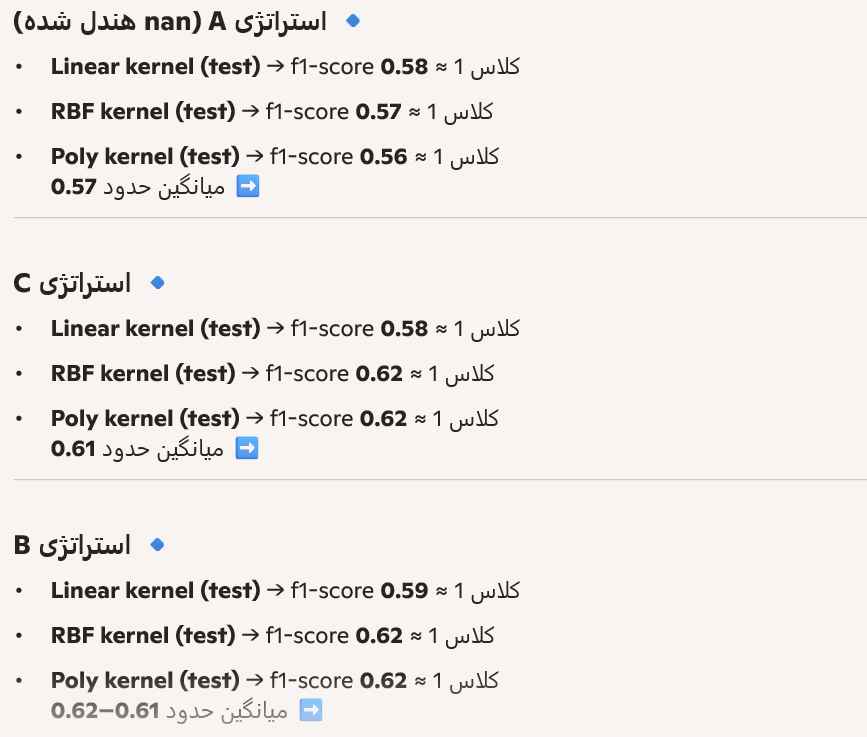

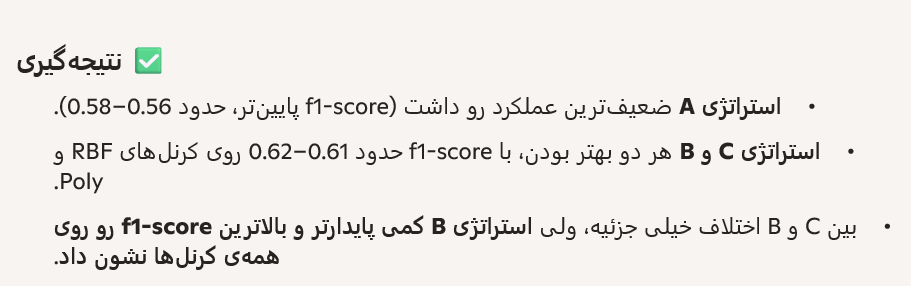

A stratejy: در این روش ما فقط مقادیر صفر را با میانگین پر کردیم ! میاگین از افراد دیابتی و غیر دیابتی به صورت همزمان گرفته شده بود و به این توجه نشده بود که برای پر کردن فیچر ها باید به دیابتی بودن یا نبودن میانگین ها توجه کرد ؛ مثلا افراد دیابتی اکثرا بی ام آی بالایی دارن و باعث میشه میانگین کلی فیچر بی ام آی کشیده بشه به اون سمت 

B stratejy:در این روش ما برای هر کلاس یک میانگین جدا در نظر گرفتیم و مقادیر صفر را بر اساس میانگین همان دسته پر کردیم تا به مقادیر واقعی ان دسته نزدیک تر باشد ، این باعث میشود میانگینی که برای بی ام آی افرادی که بی ام آی آنها صفر است ثبت میشود نزدیک تر به افراد دسته خودشان باشد و مقادیر منطقی تری در آن قرار بگیرد 

C stratejy : در این روش ما بر اساس پنج همسایه نزدیک مقادیر ( نن ) میانگین گرفتیم و آنها را پر کردیم ، در شرایطی که دیتاست بر اساس لیبل ها مرتب شده باشد یعنی افراد دیابتی و غیر دیابتی قاطی نشده باشند این روش خوب عمل میکند ولی در این شرایط که افراد با هم قاطی شده اند و اکثر افراد غیر دیابتی بودند این روش میانگین درستی به هر سمپل اضافه نمی کند 

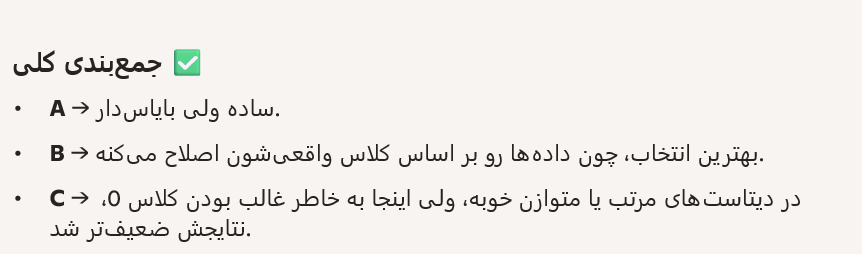

در نهایت بهترین کرنل پولی نمیال و بهترین استراتژی در این  دیتا ست استراتژی بی هست . 